In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import math


from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    explained_variance_score,
    r2_score,
)
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score

In [2]:
df = pd.read_csv("data/BTC-USD.csv")
df = df[["Date", "Close"]]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2747 non-null   object 
 1   Close   2747 non-null   float64
dtypes: float64(1), object(1)
memory usage: 43.1+ KB


In [3]:
df["Close"].sum()

32092904.594296

In [4]:
df["Date"] = pd.to_datetime(df["Date"])

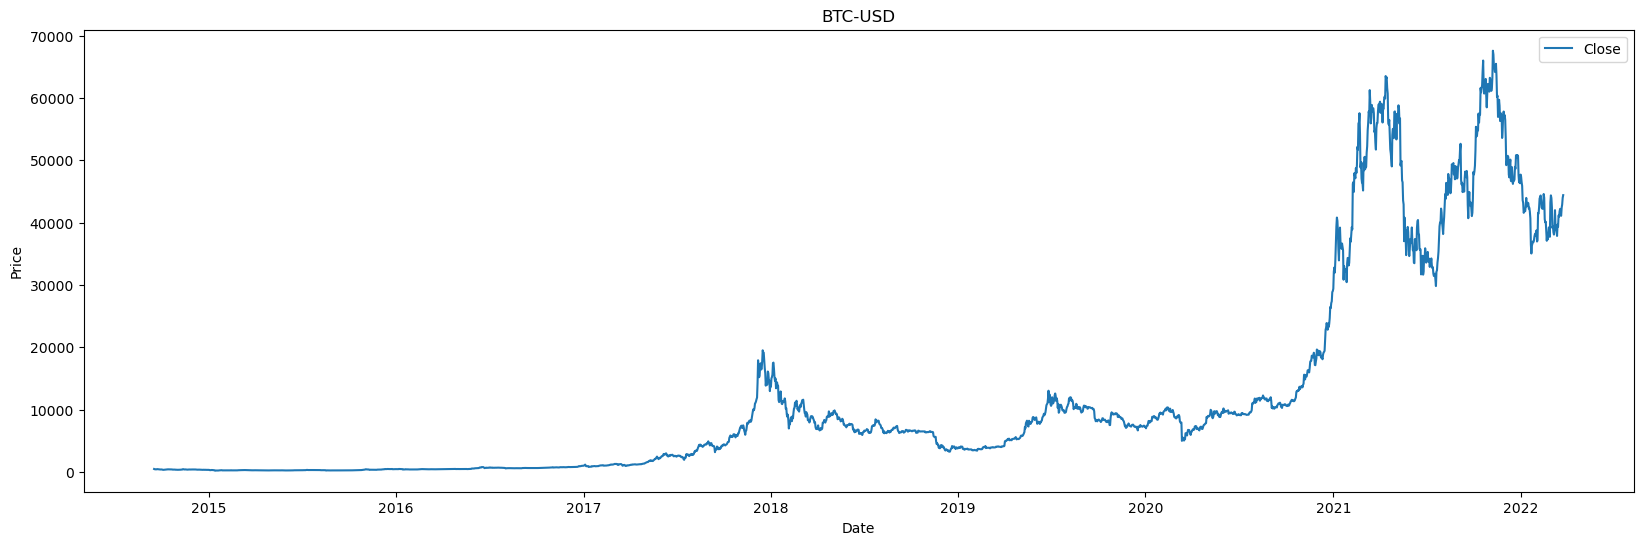

In [5]:
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(df["Date"], df["Close"], label="Close")

ax.set_title("BTC-USD")
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend()
plt.show()

In [6]:
scaler = MinMaxScaler(feature_range=(0, 1))

scaled_df = scaler.fit_transform(np.array(df["Close"]).reshape(-1, 1))

print(scaled_df.shape)

(2747, 1)


### Preparing the data
* We take 70% of the data for training and 30% for testing.

* `0:training_size` indicates that it starts from the first entry and includes rows up to, but not including, the index specified by training_size. This slice represents the training data.
* The : after the comma means that all columns of the DataFrame or array are included in the slice.

* `training_size : len(scaled_df)` specifies the rows from the training_size index up to the last row of the array or DataFrame.

In [7]:
training_size = int(len(scaled_df) * 0.70)
test_size = len(scaled_df) - training_size

train_data, test_data = (
    scaled_df[0:training_size, :],
    scaled_df[training_size : len(scaled_df), :],
)

print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (1922, 1)
test_data:  (825, 1)


In [8]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i : (i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [9]:
time_step = 10

X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (1911, 10)
y_train:  (1911,)
X_test:  (814, 10)
y_test (814,)


In [10]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (1911, 10, 1)
X_test:  (814, 10, 1)


In [11]:
model = Sequential()

model.add(LSTM(10, input_shape=(None, 1), activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error", optimizer="adam")

C:\Users\mukha\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=200,
    batch_size=32,
    verbose=1,
)

Epoch 1/200


60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0025 - val_loss: 0.0871
Epoch 2/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.6252e-04 - val_loss: 0.0110
Epoch 3/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.1519e-05 - val_loss: 0.0064
Epoch 4/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.4677e-05 - val_loss: 0.0061
Epoch 5/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.7973e-05 - val_loss: 0.0047
Epoch 6/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.6819e-05 - val_loss: 0.0042
Epoch 7/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.7087e-05 - val_loss: 0.0056
Epoch 8/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0373e-05 - val_loss: 0.0047
Epoch 9/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8966e-05 - val_loss: 0.0044
Epoch 10/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5958e-05 - val_loss: 0.0055
Epoch 11/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3545e-05 - val_loss: 0.0056
Epoch 12/200
60/60 ━━━━━━━━━━━━━━━━

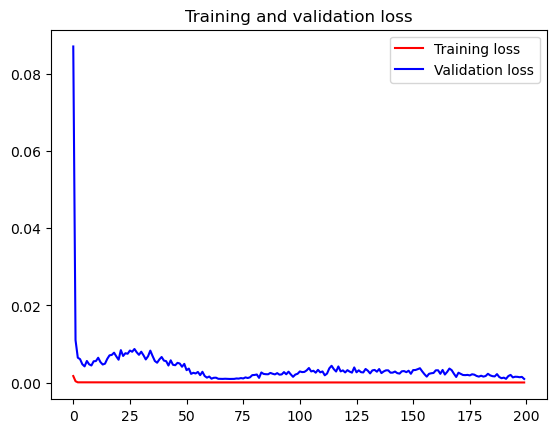

<Figure size 640x480 with 0 Axes>

In [13]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(loss))

plt.plot(epochs, loss, "r", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend(loc=0)
plt.figure()


plt.show()

In [14]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
train_predict.shape, test_predict.shape

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step


((1911, 1), (814, 1))

In [15]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1, 1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1, 1))

In [16]:
print(
    "Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain, train_predict))
)
print("Train data MSE: ", mean_squared_error(original_ytrain, train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain, train_predict))
print(
    "-------------------------------------------------------------------------------------"
)
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest, test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest, test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest, test_predict))

Train data RMSE:  298.46709357445474
Train data MSE:  89082.6059467823
Train data MAE:  146.13447179822103
-------------------------------------------------------------------------------------
Test data RMSE:  2056.814925495688
Test data MSE:  4230487.637741832
Test data MAE:  1294.2781889231806


In [17]:
print(
    "Train data explained variance regression score:",
    explained_variance_score(original_ytrain, train_predict),
)
print(
    "Test data explained variance regression score:",
    explained_variance_score(original_ytest, test_predict),
)

Train data explained variance regression score: 0.9946238012074069
Test data explained variance regression score: 0.9892541988583397


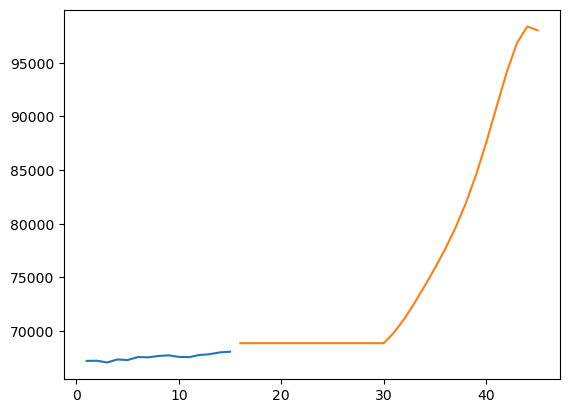

In [28]:
# preduct next 30 days
raw_data = np.array(
    [
        61686.1,
        61278.9,
        63805.3,
        63411.9,
        65697.4,
        63849.9,
        67151.9,
        70011.6,
        70622.1,
        69148.0,
        71630.1,
        69360.4,
        68890.6,
        67830.6,
        68496.5,
    ]
)


scaled_data = scaler.fit_transform(raw_data.reshape(-1, 1))

time_step = 15
x_input = scaled_data[-time_step:]

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

lst_output = []
n_steps = time_step
i = 0
while i < 30:
    if len(temp_input) > time_step:
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape(1, n_steps, 1)
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = x_input.reshape(1, n_steps, 1)
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1

day_new = np.arange(1, time_step + 1)
day_pred = np.arange(time_step + 1, time_step + 31)

plt.plot(day_new, scaler.inverse_transform(test_data[-time_step:]).reshape(-1, 1))
plt.plot(day_pred, scaler.inverse_transform(lst_output))
plt.show()